In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from src.data import load_dataset

/home/ubuntu/projects/temporal_classifier/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Point Benchmarks

## Temporal Contexts

In [2]:
trainset = load_dataset("temporal_contexts", "train")
validset = load_dataset("temporal_contexts", "valid")
testset = load_dataset("temporal_contexts", "test")

In [3]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

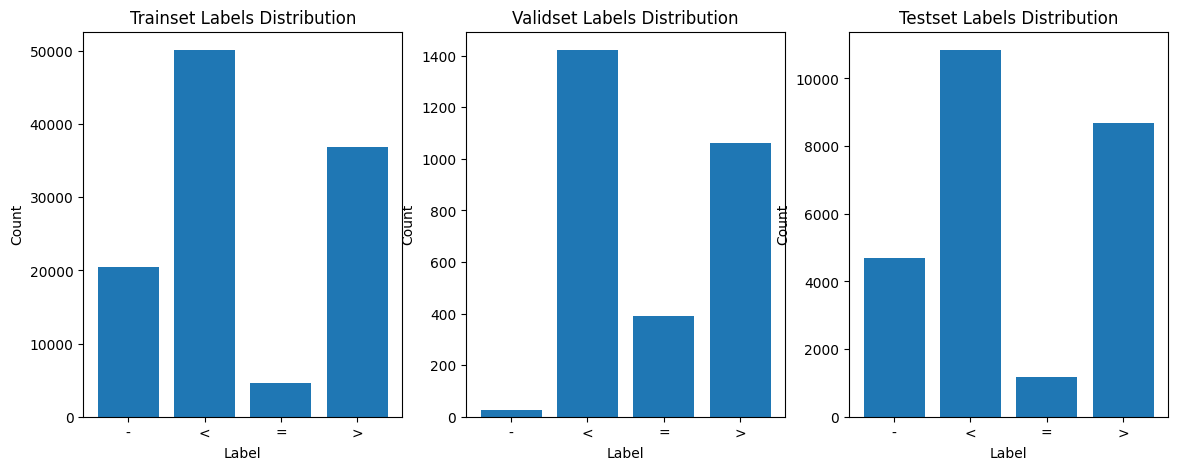

In [4]:
label_order = sorted(valid_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

In [5]:
train_docs = set(trainset["doc"])
valid_docs = set(validset["doc"])
test_docs = set(testset["doc"])

print("Trainset docs:", len(train_docs))
print("Validset docs:", len(valid_docs))
print("Testset docs:", len(test_docs))

Trainset docs: 241
Validset docs: 18
Testset docs: 129


In [6]:
# Check the intersection of docs
print(
    "Intersection of docs train, valid, test:", len(train_docs & valid_docs & test_docs)
)
print("Intersection of docs train, test:", len(train_docs & test_docs))
print("Intersection of docs valid, test:", len(valid_docs & test_docs))
print("Intersection of docs train, valid:", len(train_docs & valid_docs))

Intersection of docs train, valid, test: 0
Intersection of docs train, test: 0
Intersection of docs valid, test: 0
Intersection of docs train, valid: 0


In [7]:
# check it there is any text that is duplicated
train_texts = set(trainset["text"])
valid_texts = set(validset["text"])
test_texts = set(testset["text"])

print(f"Len train {len(trainset)} Number of unique texts {len(train_texts)}")
print(f"Len valid {len(validset)} Number of unique texts {len(valid_texts)}")
print(f"Len test {len(testset)} Number of unique texts {len(test_texts)}")

Len train 112069 Number of unique texts 112069
Len valid 2902 Number of unique texts 2902
Len test 25393 Number of unique texts 25247


In [8]:
# check it there is any text that occurs in more than on set
train_texts = set(trainset["text"])
valid_texts = set(validset["text"])
test_texts = set(testset["text"])

print(
    "Intersection of texts train, valid, test:",
    len(train_texts & valid_texts & test_texts),
)
print("Intersection of texts train, test:", len(train_texts & test_texts))
print("Intersection of texts valid, test:", len(valid_texts & test_texts))
print("Intersection of texts train, valid:", len(train_texts & valid_texts))

Intersection of texts train, valid, test: 0
Intersection of texts train, test: 0
Intersection of texts valid, test: 0
Intersection of texts train, valid: 0


## Timeset

In [9]:
testset = load_dataset("timeset", "test")
validset = load_dataset("timeset", "valid")

### Test Labels Distribution

In [10]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

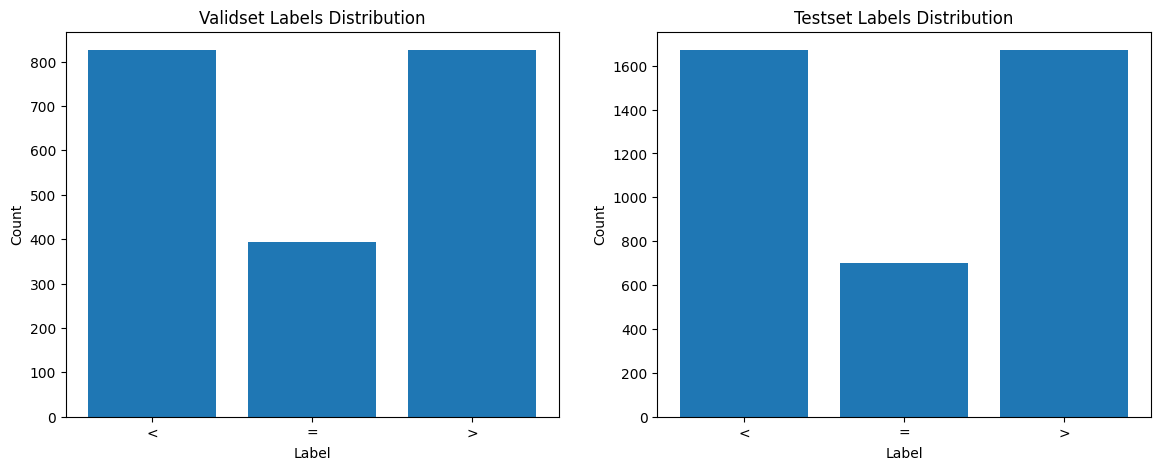

In [11]:
label_order = sorted(valid_labels_counter.keys())

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[0].set_title("Validset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[1].set_title("Testset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")
plt.show()

### Example Questions

In [12]:
print("Context:\n", testset[0]["text"])
print()
print("Label:\n", testset[0]["label"])

Context:
 Twelve-year journey of Rosetta ends; spacecraft crashes into comet Monday, October 3, 2016  On Friday, European Space Agency's (ESA) spacecraft Rosetta ended its mission, <start_source>crashing</start_source> into Jupiter-family comet 67P/Churyumov–Gerasimenko. Rosetta is the first spacecraft to orbit a comet; it traveled in space for twelve years and about eight billion kilometres (about five billion miles). The ESA's Darmstadt, Germany control centre <start_target>ceased</start_target> to receive signals from the spacecraft, confirming the Rosetta mission's end, at 11:19 UTC. Mission controllers said it was traveling about 90 centimeters per second on impact (two miles per hour), about a walking pace. Almost two years ago, in November 2014, Rosetta successfully landed a probe called Philae onto 67P/Churyumov–Gerasimenko, with amongst its goals better understanding how the Solar System was formed. Philae's discoveries included the presence of molecular oxygen and nitrogen on

## MATRES


In [15]:
trainset = load_dataset("matres", "train")
validset = load_dataset("matres", "valid")
testset = load_dataset("matres", "test")

100%|██████████| 275/275 [00:00<00:00, 588.35it/s]


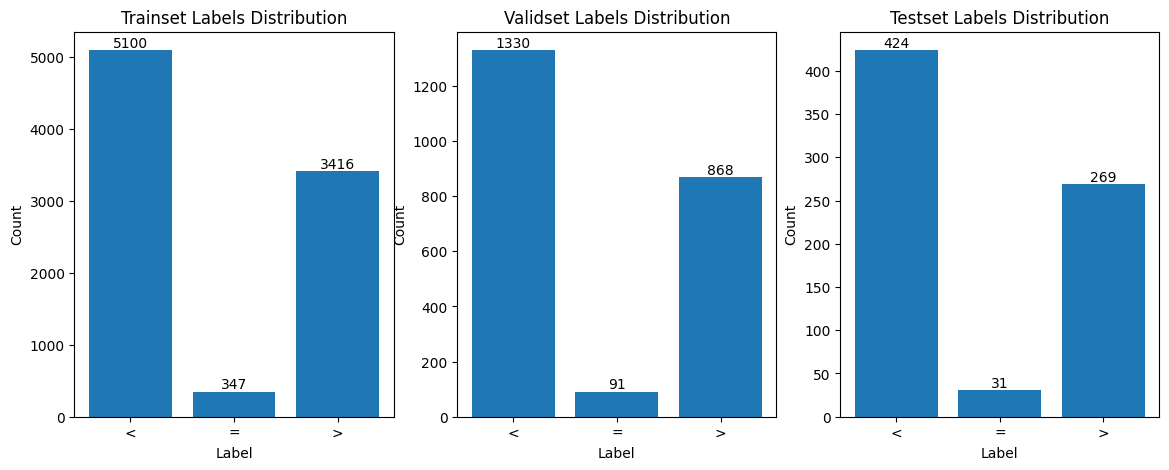

In [16]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
for i, v in enumerate([train_labels_counter[label] for label in label_order]):
    axs[0].text(i, v, str(v), ha="center", va="bottom")
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [valid_labels_counter[label] for label in label_order])
for i, v in enumerate([valid_labels_counter[label] for label in label_order]):
    axs[1].text(i, v, str(v), ha="center", va="bottom")
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].bar(label_order, [test_labels_counter[label] for label in label_order])
for i, v in enumerate([test_labels_counter[label] for label in label_order]):
    axs[2].text(i, v, str(v), ha="center", va="bottom")
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

## Point TempEval

In [17]:
trainset = load_dataset("point_tempeval", "train")
validset = load_dataset("point_tempeval", "valid")
testset = load_dataset("point_tempeval", "test")

100%|██████████| 275/275 [00:00<00:00, 586.81it/s]


In [18]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

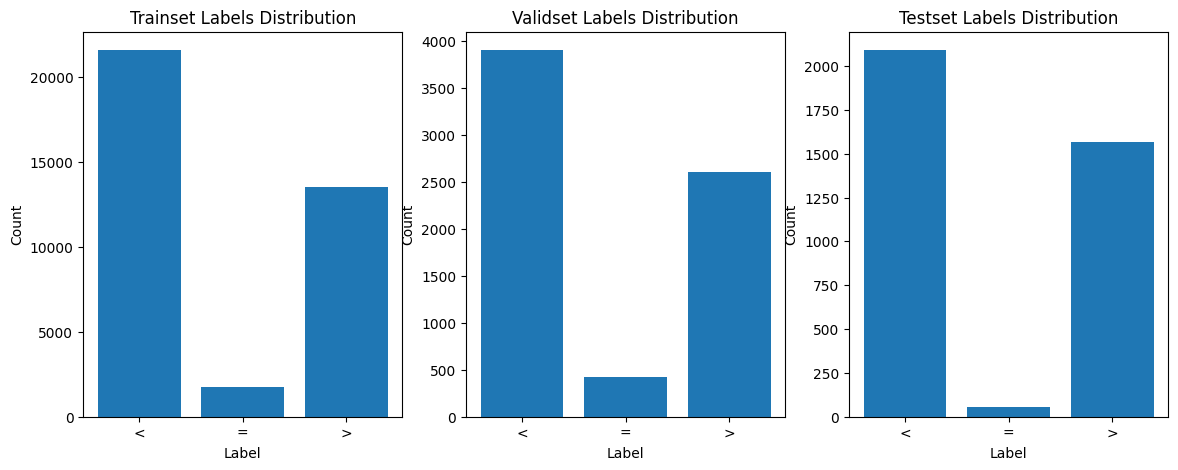

In [19]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

## Point TempEval Closure

In [20]:
trainset = load_dataset("point_tempeval", "train", closure=True)
validset = load_dataset("point_tempeval", "valid", closure=True)
testset = load_dataset("point_tempeval", "test", closure=True)

100%|██████████| 275/275 [00:00<00:00, 584.88it/s]


In [21]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

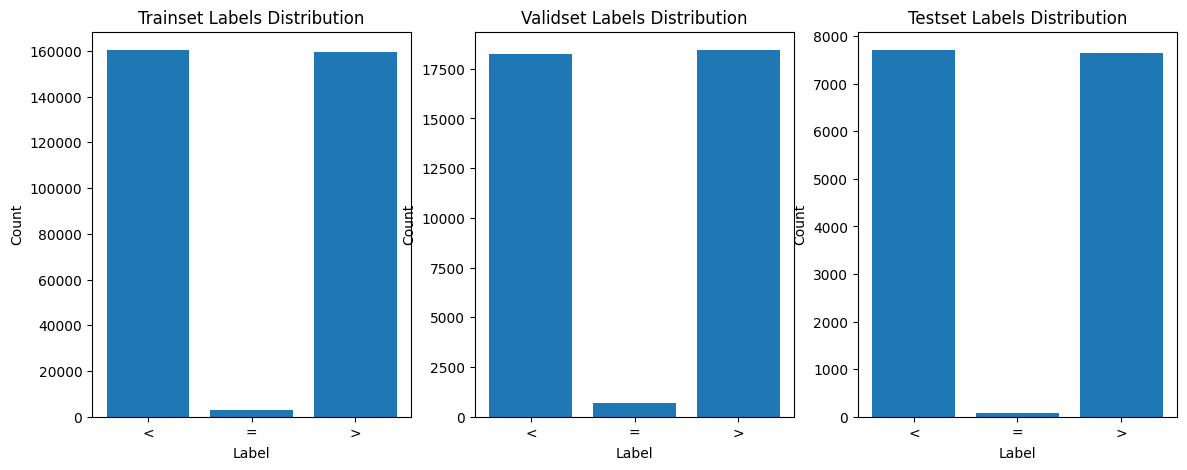

In [22]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

# Interval Benchmarks

## TempEval-3

In [23]:
import tieval.datasets

corpus = tieval.datasets.read("tempeval_3")

all_labels = [tl.relation.interval for doc in corpus.documents for tl in doc.tlinks]
unique_labels = list(set(all_labels))
test_docs = corpus.test

100%|██████████| 275/275 [00:00<00:00, 587.42it/s]


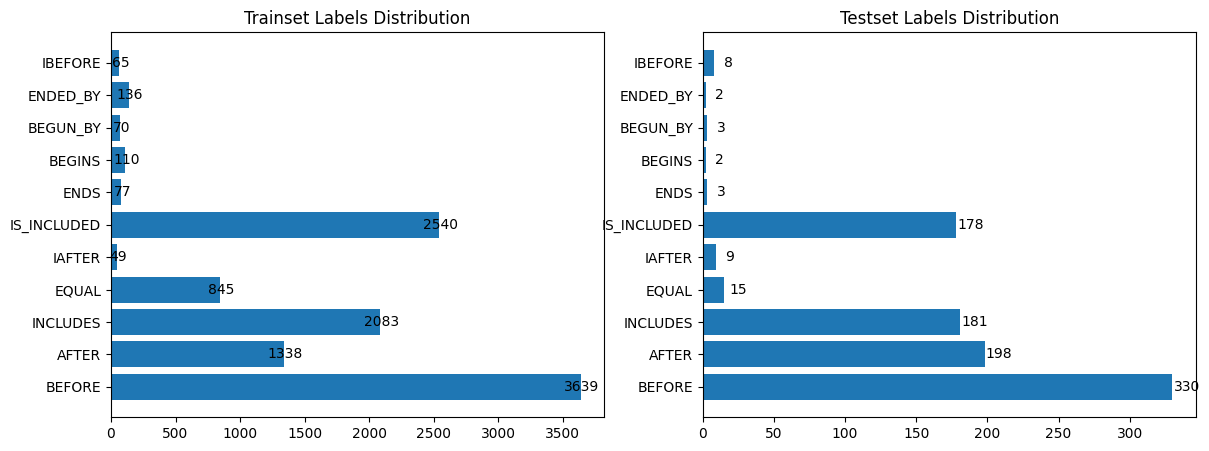

In [24]:
train_labels = [tl.relation.interval for doc in corpus.train for tl in doc.tlinks]
train_label_counter = Counter(train_labels)

test_labels = [tl.relation.interval for doc in test_docs for tl in doc.tlinks]
test_label_counter = Counter(test_labels)
# set the order of the test labels to be the same as the train labels
test_label_counter = {
    label: test_label_counter[label] for label in train_label_counter.keys()
}

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].barh(train_label_counter.keys(), train_label_counter.values())
axs[0].set_title("Trainset Labels Distribution")

# add the number to the bars
for i, v in enumerate(train_label_counter.values()):
    axs[0].text(v + 10, i, str(v), ha="center", va="center")

axs[1].barh(test_label_counter.keys(), test_label_counter.values())
axs[1].set_title("Testset Labels Distribution")
# add the number to the bars
for i, v in enumerate(test_label_counter.values()):
    axs[1].text(v + 10, i, str(v), ha="center", va="center")
plt.show()

In [29]:
unique_labels

['AFTER',
 'BEFORE',
 'IS_INCLUDED',
 'BEGUN_BY',
 'SIMULTANEOUS',
 'IAFTER',
 'ENDED_BY',
 'IBEFORE',
 'ENDS',
 'BEGINS',
 'INCLUDES']

## TDDiscourse

In [3]:
trainset = load_dataset("interval_tddiscourse", "train")
validset = load_dataset("interval_tddiscourse", "valid")
testset = load_dataset("interval_tddiscourse", "test")

100%|██████████| 183/183 [00:00<00:00, 675.67it/s]


In [4]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

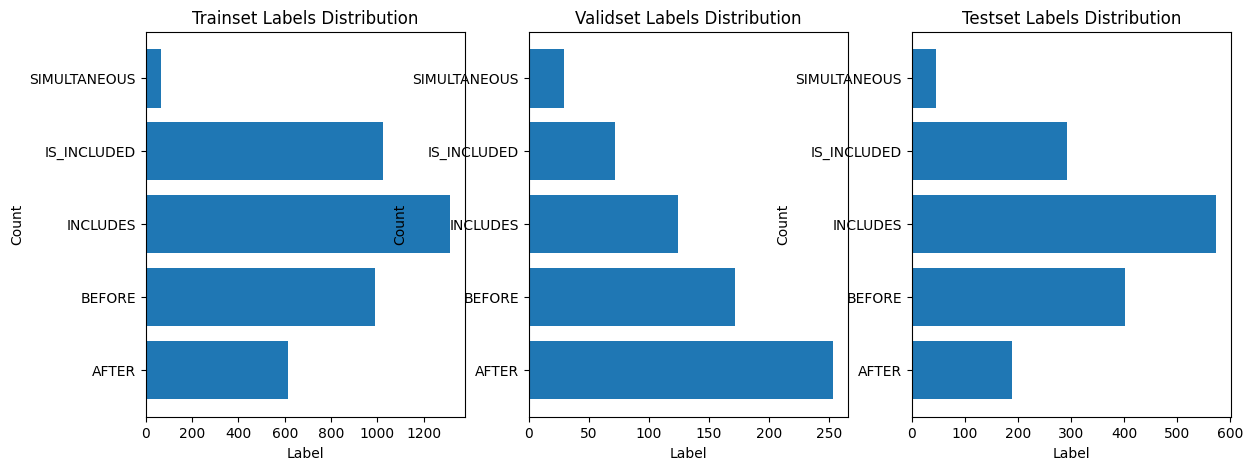

In [6]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].barh(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].barh(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].barh(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

## MeanTime

In [1]:
trainset = load_dataset("interval_meantime", "train")
validset = load_dataset("interval_meantime", "valid")
testset = load_dataset("interval_meantime", "test")

NameError: name 'load_dataset' is not defined

In [10]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

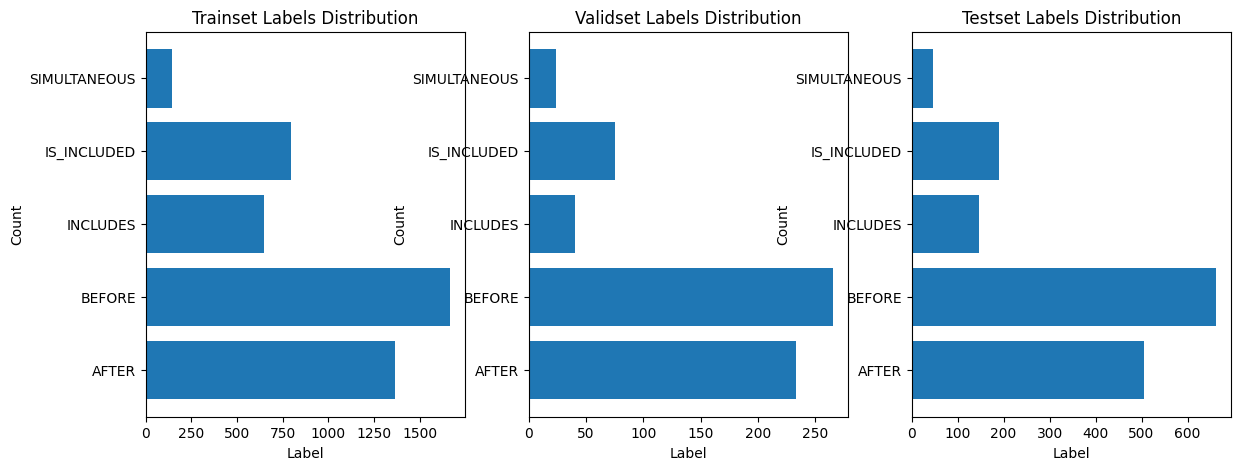

In [12]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].barh(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].barh(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].barh(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

## TimeBankDense

In [3]:
trainset = load_dataset("interval_timebank_dense", "train")
validset = load_dataset("interval_timebank_dense", "valid")
testset = load_dataset("interval_timebank_dense", "test")

100%|██████████| 183/183 [00:00<00:00, 642.88it/s]


data/timebank_dense/train/TimebankDense.full.txt


100%|██████████| 183/183 [00:00<00:00, 672.08it/s]


data/timebank_dense/train/TimebankDense.full.txt


100%|██████████| 183/183 [00:00<00:00, 670.67it/s]


data/timebank_dense/train/TimebankDense.full.txt


In [4]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

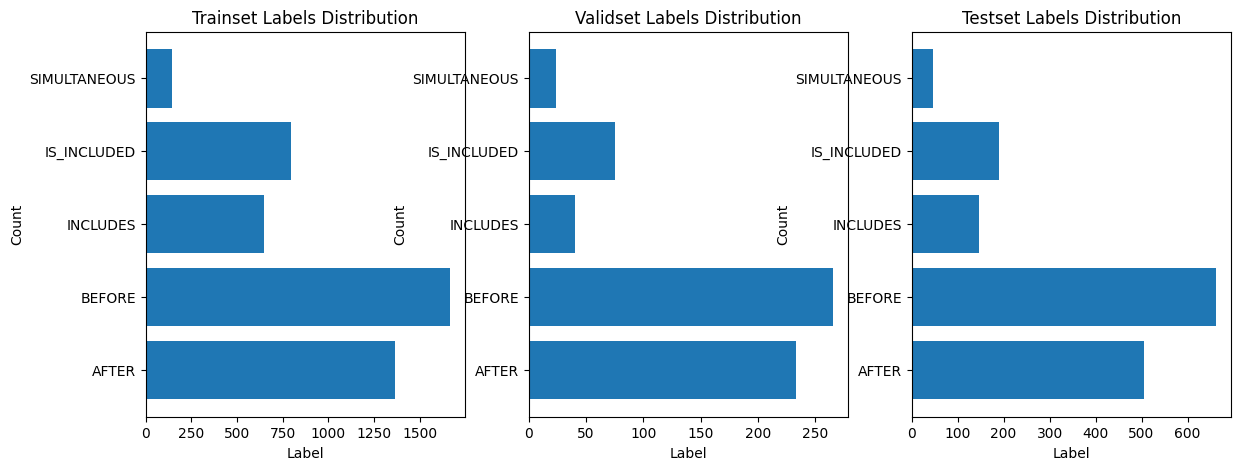

In [5]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].barh(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].barh(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].barh(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()